Naivedya Rai - 20070122083 - CSB1
Apply the K-Nearest Neighbours Classifier algorithm on a sample case study and data set. Evaluate
Results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/navi/Downloads/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# raw data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# dropping duplicate datapoints
df  = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 18.8+ KB


In [6]:
# checking for null values
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# Checking for values for the columns Gender and Purchased in the dataset
print(f'Gender: {df["Gender"].unique()}')
print(f'Purchased: {df["Purchased"].unique()}')

Gender: ['Male' 'Female']
Purchased: [0 1]


In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
# dropping User ID column from the training dataset
df =df.drop(columns='User ID')
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Outlier Detection

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Upon observing the "EstimatedSalary" column, we notice an apparent anomaly in the maximum value, which is 150,000. To gain further insights, we can perform a salary frequency count and plot a graph to visualize the distance of the 150,000 data point from the rest of the dataset. The standard deviation, approximately 34,100, also aids in understanding the spread of the data. By employing these analytical methods, we aim to comprehend the significance of the outlier and its impact on the overall dataset.


In [11]:
df['EstimatedSalary'].value_counts()


72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: EstimatedSalary, Length: 117, dtype: int64

### Exploratory Data Analysis

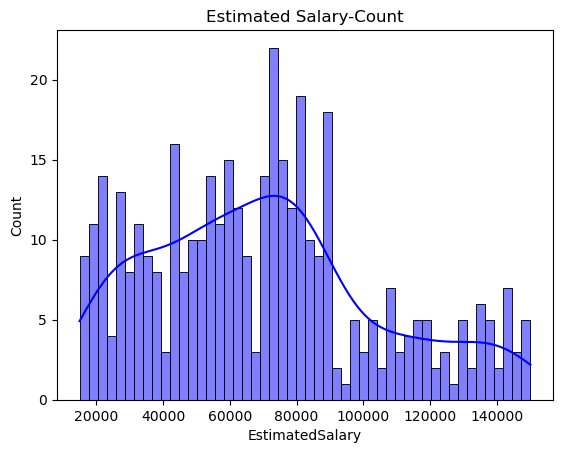

In [12]:
sns.histplot(df['EstimatedSalary'],kde=True,color='blue',bins=50)
plt.title('Estimated Salary-Count') 
plt.show()  

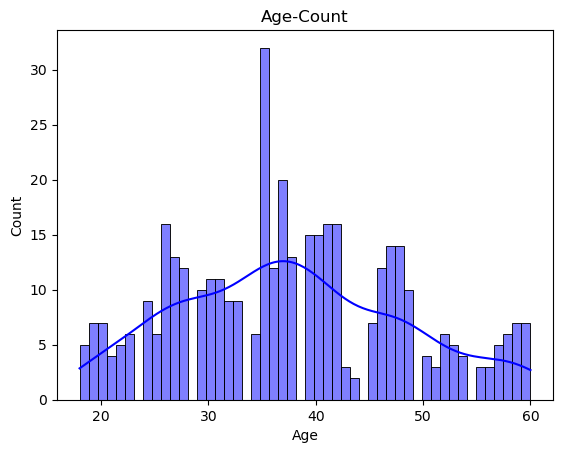

In [13]:
# Age distribution histogram
sns.histplot(df['Age'],kde=True,color='blue',bins=50)
plt.title('Age-Count') 
plt.show()  

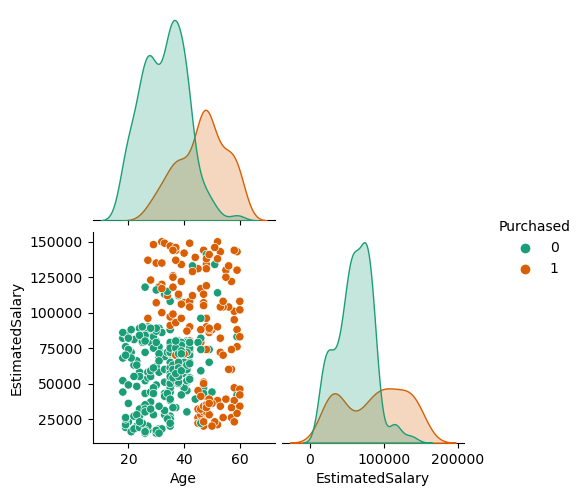

In [14]:
# pairplot of age and estimated salary wrt purchased
sns.pairplot(df , hue = 'Purchased',palette='Dark2',corner=True )
plt.show()

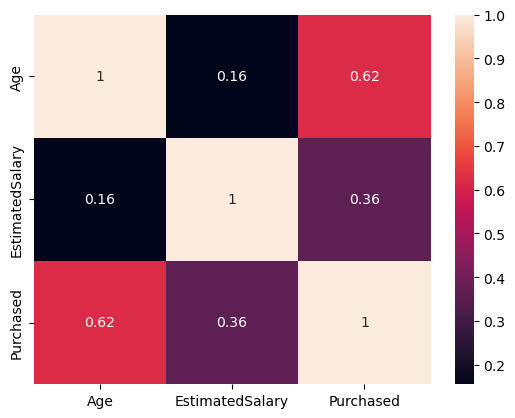

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


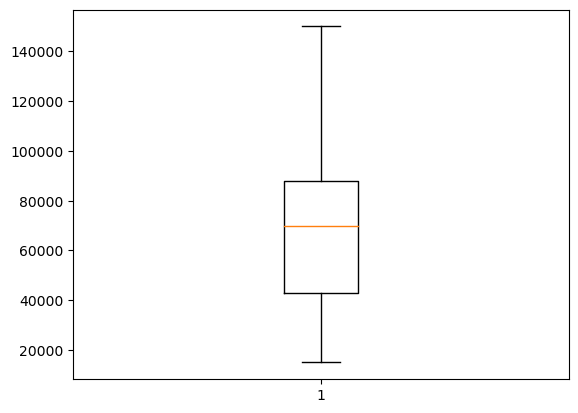

In [16]:
# boxplot distribution for EstimatedSalary Column
dfArr=np.array(df['EstimatedSalary'])
plt.boxplot(dfArr)
plt.show()

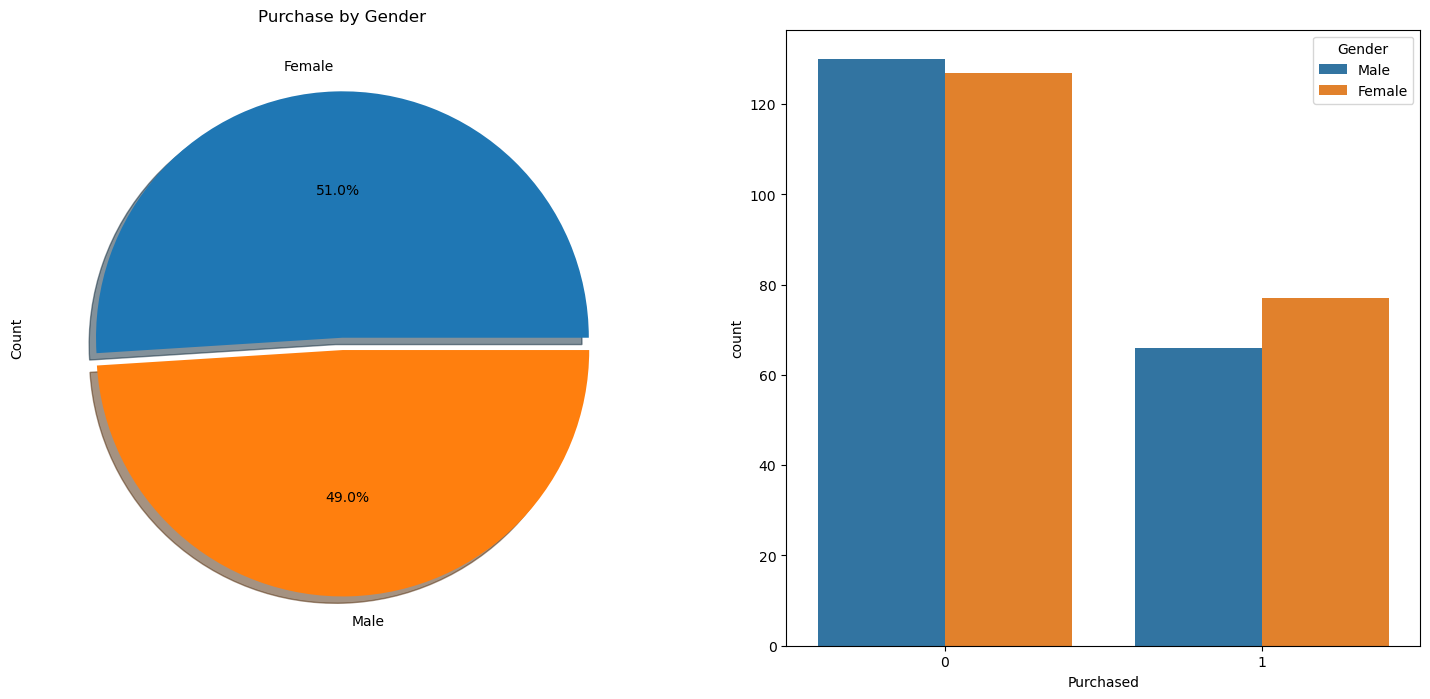

In [17]:
# Relation between gender and sales
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchase by Gender')
ax[0].set_ylabel('Count')
sns.countplot(x=df['Purchased'],hue='Gender',data=df)
plt.show()

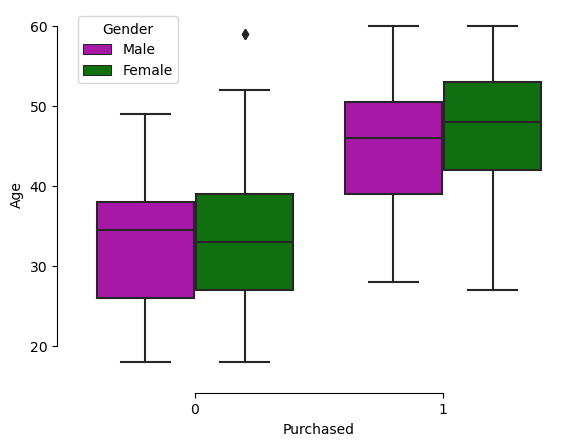

In [18]:
# Relation between age and purchase for each gender
sns.boxplot(x="Purchased", y="Age",hue="Gender", palette=["m", "g"],data=df)
sns.despine(offset=10, trim=True)


The charts reveal a notable trend where customers aged between 40 and 60 years old exhibit the highest salaries and make the most purchases. Consequently, this specific demographic becomes the prime target for our sales and marketing endeavors.

In summary, our primary buying audience comprises individuals over 40 years old, with women being the most active purchasers. On the other hand, the non-buying segment consists of those under 35 years old, where the gender distribution remains consistent, with men making fewer purchases compared to women.

### Feature Engineering

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 31.8+ KB


In [20]:
#Transforming a categorical variable into a numerical variable
le=LabelEncoder()
le.fit(df['Gender'])
print(df['Gender'])
df['Gender']=le.transform(df['Gender'])
df['Gender'].unique() #Verifying that as seen previously there are only two distinct genres!

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object


array([1, 0])

In [21]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 31.8 KB


### Dataset Train Test Split

In [23]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline

# Train and test for raw data
x = df.drop('Purchased', axis=1)
y = df['Purchased']

Norm = make_pipeline(MinMaxScaler())
x = Norm.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
y_train.value_counts()

0    189
1    111
Name: Purchased, dtype: int64

### Training the KNN Model

In [25]:
# Classification metrics
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Classifiers
from sklearn.neighbors import KNeighborsClassifier

In [48]:
import warnings

warnings.filterwarnings('ignore')

In [55]:
model_raw=dict()
acc_raw= dict()
y_predraw=dict()
recall_raw=dict()
precision_raw=dict()

In [56]:
def knn_train_dist(dist):

    for i in range(3,21,2):
        model_raw[i] = KNeighborsClassifier(n_neighbors =i, p=dist)
        model_raw[i].fit(x_train,y_train)
        y_predraw[i]=model_raw[i].predict(x_test)
        
    # Metrics 
        acc_raw[i]=model_raw[i].score(x_test,y_test)
        precision_raw[i]=precision_score(y_test,y_predraw[i])
        recall_raw[i]=recall_score(y_test,y_predraw[i])
        print(f'n_neighbors_raw = {i} accuracy = {acc_raw[i]:.2f}| recall = {recall_raw[i]:.2f} | precision = {precision_raw[i]:.2f}')

    print(f'\nThe maximum recall is {max(recall_raw.values()):.2f} reached when n_neighbors= {max(recall_raw,key=recall_raw.get):.2f}')
    print(f'\nThe maximum accuracy {max(acc_raw.values())} at n_neighbors = {max(acc_raw, key=acc_raw.get):.2f}')
    print(f'\nThe maximum precision is {max(precision_raw.values()):.2f} reached when n_neighbors= {max(precision_raw,key=precision_raw.get):.2f}')

In [57]:
# Manual Grid Search CV algo for varying odd values of K (3, 5, 7, 9, 11, 13, 15,17,19)
print(f'KNN Model for Euclidean Distance\n')
knn_train_dist(2)

KNN Model for Euclidean Distance

n_neighbors_raw = 3 accuracy = 0.92| recall = 0.88 | precision = 0.88
n_neighbors_raw = 5 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 7 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 9 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 11 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 13 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 15 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 17 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 19 accuracy = 0.93| recall = 0.91 | precision = 0.88

The maximum recall is 0.91 reached when n_neighbors= 5.00

The maximum accuracy 0.93 at n_neighbors = 5.00

The maximum precision is 0.88 reached when n_neighbors= 5.00


In [58]:
# Manual Grid Search CV algo for varying odd values of K (3, 5, 7, 9, 11, 13, 15,17,19)
print(f'KNN Model for Manhattan Distance\n')
knn_train_dist(1)

KNN Model for Manhattan Distance

n_neighbors_raw = 3 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 5 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 7 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 9 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 11 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 13 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 15 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 17 accuracy = 0.93| recall = 0.91 | precision = 0.88
n_neighbors_raw = 19 accuracy = 0.93| recall = 0.91 | precision = 0.88

The maximum recall is 0.91 reached when n_neighbors= 3.00

The maximum accuracy 0.93 at n_neighbors = 3.00

The maximum precision is 0.88 reached when n_neighbors= 3.00


In [59]:
mypr=precision_raw.items()
myrr=recall_raw.items()
myar=acc_raw.items()
mypr=sorted(mypr)
myrr=sorted(myrr)
myar=sorted(myar)

In [60]:
a , b = zip(*mypr)
a, b1 = zip(*myrr)
a, b2 = zip(*myar)

Text(200, 200, 'Recall')

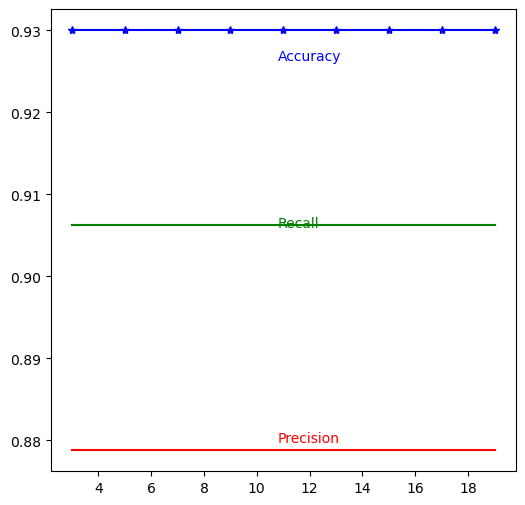

In [61]:
fig, (axr) = plt.subplots(1,figsize=(6,6))
line, = axr.plot(a, b, 'r-')
line1, = axr.plot(a, b1,'g-')
line2, = axr.plot(a, b2,'b*-')

axr.annotate('Accuracy',
            xy=(200, 320), xycoords='figure points',fontsize=10,color='blue')
axr.annotate('Precision',
            xy=(200, 45), xycoords='figure points',fontsize=10,color='red')
axr.annotate('Recall',
            xy=(200, 200), xycoords='figure points',fontsize=10,color='green')

In [62]:
model = KNeighborsClassifier(n_neighbors=5, p=2, n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [63]:
model

KNeighborsClassifier(n_jobs=-1)

### Evaluation Metrics

In [64]:
y_test = y_test.to_numpy()

In [65]:
df2 = pd.DataFrame()
df2['actual'] = y_test
df2['predicted'] = y_pred
df2 = df2.reset_index(drop=True)

In [66]:
df2

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,1
98,1,1


In [70]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[64  4]
 [ 3 29]]


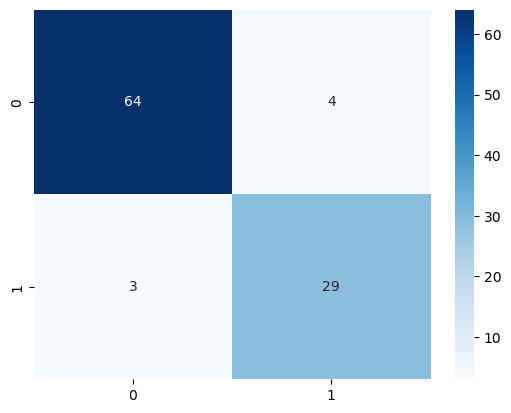

In [72]:
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")


# Display the visualization of the Confusion Matrix.
plt.show()


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

